In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from sklearn.linear_model import LinearRegression
from LinReg import *
from math import log10, floor

In [4]:
# Helpful functions
def roundsig(x, sig=4):
    return round(x, sig - int(floor(log10(abs(x)))) - 1)

def lin_predict(uk, reg):
    return ((uk - reg.intercept_) / reg.coef_)

In [6]:
raw = pd.read_excel(r'C:\Users\jgage\Desktop\Business\Undergrad\S21/CHM596/D/Wright_Report D.xlsx', engine='openpyxl')

In [11]:
raw.rename(columns={'Na Std. (mL)': 'Std', 'Std. (ppm)': 'Std_c', 'Corr. Abs. (a.u.)': 'CorrAbs'}, inplace=True)
extNa = raw.iloc[0:5, 0:6]
extNa.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
extNa_regl = Least_sq(extNa['Std_c'], extNa['CorrAbs'])

SaNa = raw.iloc[5:9, 0:6]
SaNa.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
SaNa_regl = Least_sq(SaNa['Std'], SaNa['CorrAbs'])

extMg = raw.iloc[11:16, 0:6]
extMg.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
extMg_regl = Least_sq(extMg['Std_c'], extMg['CorrAbs'])

SaMg = raw.iloc[16:20, 0:6]
SaMg.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
SaMg_regl = Least_sq(SaMg['Std'], SaMg['CorrAbs'])

extCa = raw.iloc[22:27, 0:6]
extCa.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
extCa_regl = Least_sq(extCa['Std_c'], extCa['CorrAbs'])

SaCa = raw.iloc[27:31, 0:6]
SaCa.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
SaCa_regl = Least_sq(SaCa['Std'], SaCa['CorrAbs'])

PO_op = raw.iloc[37:42, 0:6]
PO_op.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
PO_op_regl = Least_sq(PO_op.loc[37:40, 'Std_c'], PO_op.loc[37:40, 'CorrAbs'])

K = raw.iloc[31:35, 0:6]
K.drop(['Color', 'Abs (a.u.)'], axis=1, inplace=True)
K_regl = Least_sq(K['Std_c'], K['CorrAbs'])

regll = [extNa_regl, SaNa_regl, extMg_regl, SaMg_regl, extCa_regl, SaCa_regl]

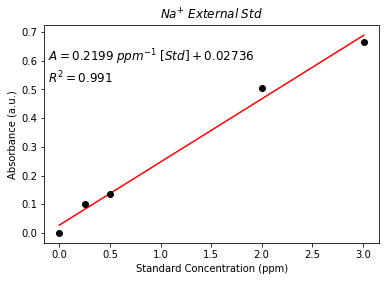

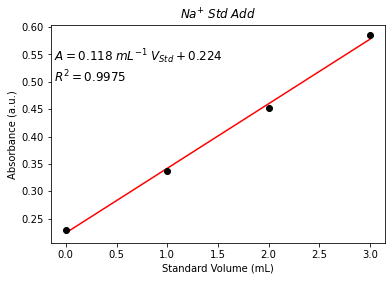

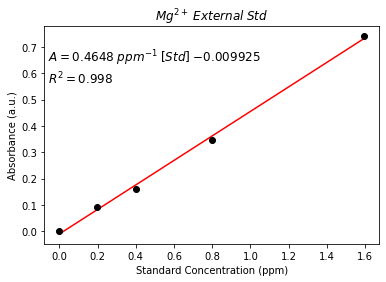

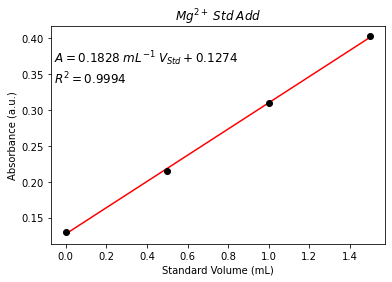

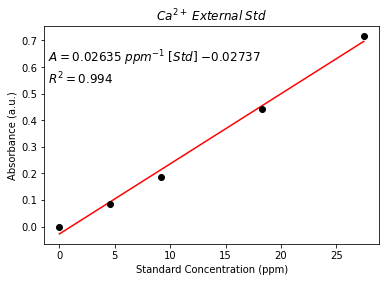

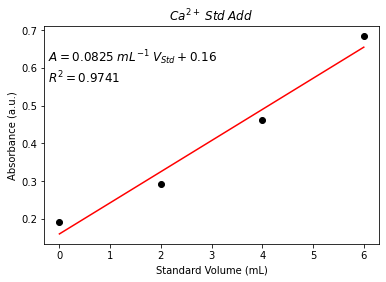

In [13]:
def plot_reg_from_regl(regl, vol=False, name='Unnamed Figure', title=''):
    reg, reg_x, reg_y = regl[0], regl[1], regl[2]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(reg_x, reg_y, c='k', zorder=1)
    ax.plot(reg_x, reg.predict(reg_x), color='r', zorder=0.8)

   

    ax.set_ylabel('Absorbance (a.u.)')
    if vol == False:
        ax.set_xlabel('Standard Concentration (ppm)')
             # Put the equation on the graph
        text_slope, text_intercept = '$'+str(roundsig(float(reg.coef_,),4))+'$', '$'+str(roundsig(float(reg.intercept_), 4))+'$'
        text_Rsquared = '$'+str(roundsig(float(reg.score(reg_x, reg_y)), 4))+'$'
        if float(reg.intercept_) >= 0:
            fig.text(0.01, 0.9,
                      r'$A =$'
                      + text_slope 
                      + r'$\;ppm^{-1}\;[Std]+$' 
                      + text_intercept + '\n'
                      + r'$R^{2}=$' + text_Rsquared,
                      horizontalalignment='left',
                      size=12,
                      verticalalignment='top',
                      transform=ax.transAxes)
        else:
            fig.text(0.01, 0.9,
                      r'$A =$'
                      + text_slope 
                      + r'$\;ppm^{-1}\;[Std]\;$' 
                      + text_intercept + '\n'
                      + r'$R^{2}=$' + text_Rsquared,
                      horizontalalignment='left',
                      size=12,
                      verticalalignment='top',
                      transform=ax.transAxes)
    else:
        ax.set_xlabel('Standard Volume (mL)')
             # Put the equation on the graph
        text_slope, text_intercept = '$'+str(roundsig(float(reg.coef_,),4))+'$', '$'+str(roundsig(float(reg.intercept_), 4))+'$'
        text_Rsquared = '$'+str(roundsig(float(reg.score(reg_x, reg_y)), 4))+'$'
        if float(reg.intercept_) >= 0:
            fig.text(0.01, 0.9,
                      r'$A =$'
                      + text_slope 
                      + r'$\;mL^{-1}\;V_{Std}+$' 
                      + text_intercept + '\n'
                      + r'$R^{2}=$' + text_Rsquared,
                      horizontalalignment='left',
                      size=12,
                      verticalalignment='top',
                      transform=ax.transAxes)
        else:
            fig.text(0.01, 0.9,
                      r'$A =$'
                      + text_slope 
                      + r'$\;V_{Std}\;$' 
                      + text_intercept + '\n'
                      + r'$R^{2}=$' + text_Rsquared,
                      horizontalalignment='left',
                      size=12,
                      verticalalignment='top',
                      transform=ax.transAxes)
        
    if title != '':
        ax.set_title(title)
    
    # plt.savefig('figs/'+str(name), dpi=600, pad_inches=0)
    return fig

plot_titles = ['$Na^{+}\;External\;Std$', '$Na^{+}\;Std\;Add$', 
               '$Mg^{2+}\;External\;Std$','$Mg^{2+}\;Std\;Add$', 
               '$Ca^{2+}\;External\;Std$', '$Ca^{2+}\;Std\;Add$']
plot_names = ['extNa', 'SaNa', 
               'extMg','SaMg',
               'extCa', 'SaCa']

for i in range(len(regll)):
    plot_reg_from_regl(regll[i], name=plot_names[i], title=plot_titles[i], vol=(i % 2 != 0))

In [17]:
dfac = 25 / 14
safac = 91.5977846 / 14
c1 = lin_predict(.191, extCa_regl[0])
c2 = safac * SaCa_regl[0].intercept_ / SaCa_regl[0].coef_
s1 = get_Ext_sx(SaCa_regl[1], SaCa_regl[2], .191)
s2 = safac * get_SA_sx(SaCa_regl[1], SaCa_regl[2])

print(SaCa_regl[0].intercept_ ,
      SaCa_regl[0].coef_)
# print(c1, s1)
# print(c2, s2)

[0.16] [[0.0825]]
[[8.28724724]] [0.6511406022752637]
[[12.68887059]] [4.090565071415857]


Text(0, 0.5, 'Absorbance (a.u.)')

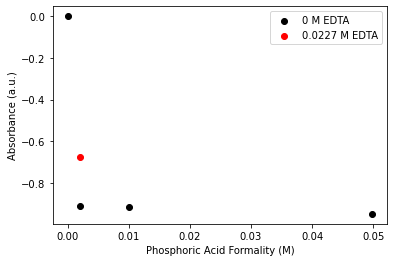

In [15]:
POfig = plt.figure()
ax = POfig.add_subplot(111)
ax.scatter(PO_op_regl[1], PO_op_regl[2], c='k', zorder=1)
# print(PO_op)
# print(PO_op.iloc[4,2], PO_op.iloc[4, 3])
ax.scatter(PO_op.iloc[4,2], PO_op.iloc[4,3], c='r')

ax.legend(['0 M EDTA', '0.0227 M EDTA'])
ax.set_xlabel('Phosphoric Acid Formality (M)')
ax.set_ylabel('Absorbance (a.u.)')
# POfig.savefig('figs/PO')

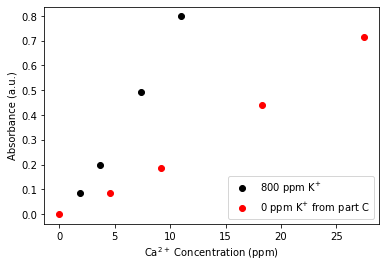

In [9]:
Kfig = plt.figure()
ax = Kfig.add_subplot(111)
ax.scatter(K_regl[1], K_regl[2], c='k', zorder=1)
ax.scatter(extCa_regl[1], extCa_regl[2], c='r', zorder=1)
ax.legend(['800 ppm K$^{+}$', '0 ppm K$^{+}$ from part C'])
#ax.text(.9,.1, 'R', transform=ax.transAxes)


ax.set_xlabel('Ca$^{2+}$ Concentration (ppm)')
ax.set_ylabel('Absorbance (a.u.)')
Kfig.savefig('figs/K_Coplot', dpi=600, pad_inches=0)

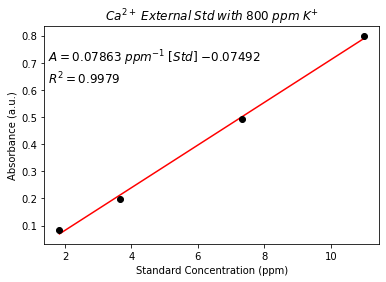

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(K_regl[1], K_regl[2], c='k', zorder=1)
ax.plot(K_regl[1], K_regl[0].predict(K_regl[1]), color='r', zorder=0.8)

ax.set_ylabel('Absorbance (a.u.)')
ax.set_xlabel('Standard Concentration (ppm)')
ax.set_title('$Ca^{2+}\;External\;Std\;with\;800\;ppm\;K^{+}$')
text_slope, text_intercept = '$'+str(roundsig(float(K_regl[0].coef_,),4))+'$', '$'+str(roundsig(float(K_regl[0].intercept_), 4))+'$'
text_Rsquared = '$'+str(roundsig(float(K_regl[0].score(K_regl[1], K_regl[2])), 4))+'$'
fig.text(0.01, 0.9, r'$A =$'
                      + text_slope 
                      + r'$\;ppm^{-1}\;[Std]\;$' 
                      + text_intercept + '\n'
                      + r'$R^{2}=$' + text_Rsquared,
                      horizontalalignment='left',
                      size=12,
                      verticalalignment='top',
                      transform=ax.transAxes)
plt.savefig('figs/K', dpi=600, pad_inches=0)

In [11]:
.07863 - .02635

0.05228000000000001